<a href="https://colab.research.google.com/github/alforerov/BigData-UD/blob/main/Taller2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import scipy.io as sio

mat_data = sio.loadmat('/content/data_clusters.mat')
print(mat_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X'])


In [13]:
data = mat_data['X']

In [14]:
from scipy.cluster.hierarchy import linkage, dendrogram

single_linkage = linkage(data, method='single')
complete_linkage = linkage(data, method='complete')
ward_linkage = linkage(data, method='ward')
centroid_linkage = linkage(data, method='centroid')
average_linkage = linkage(data, method='average')

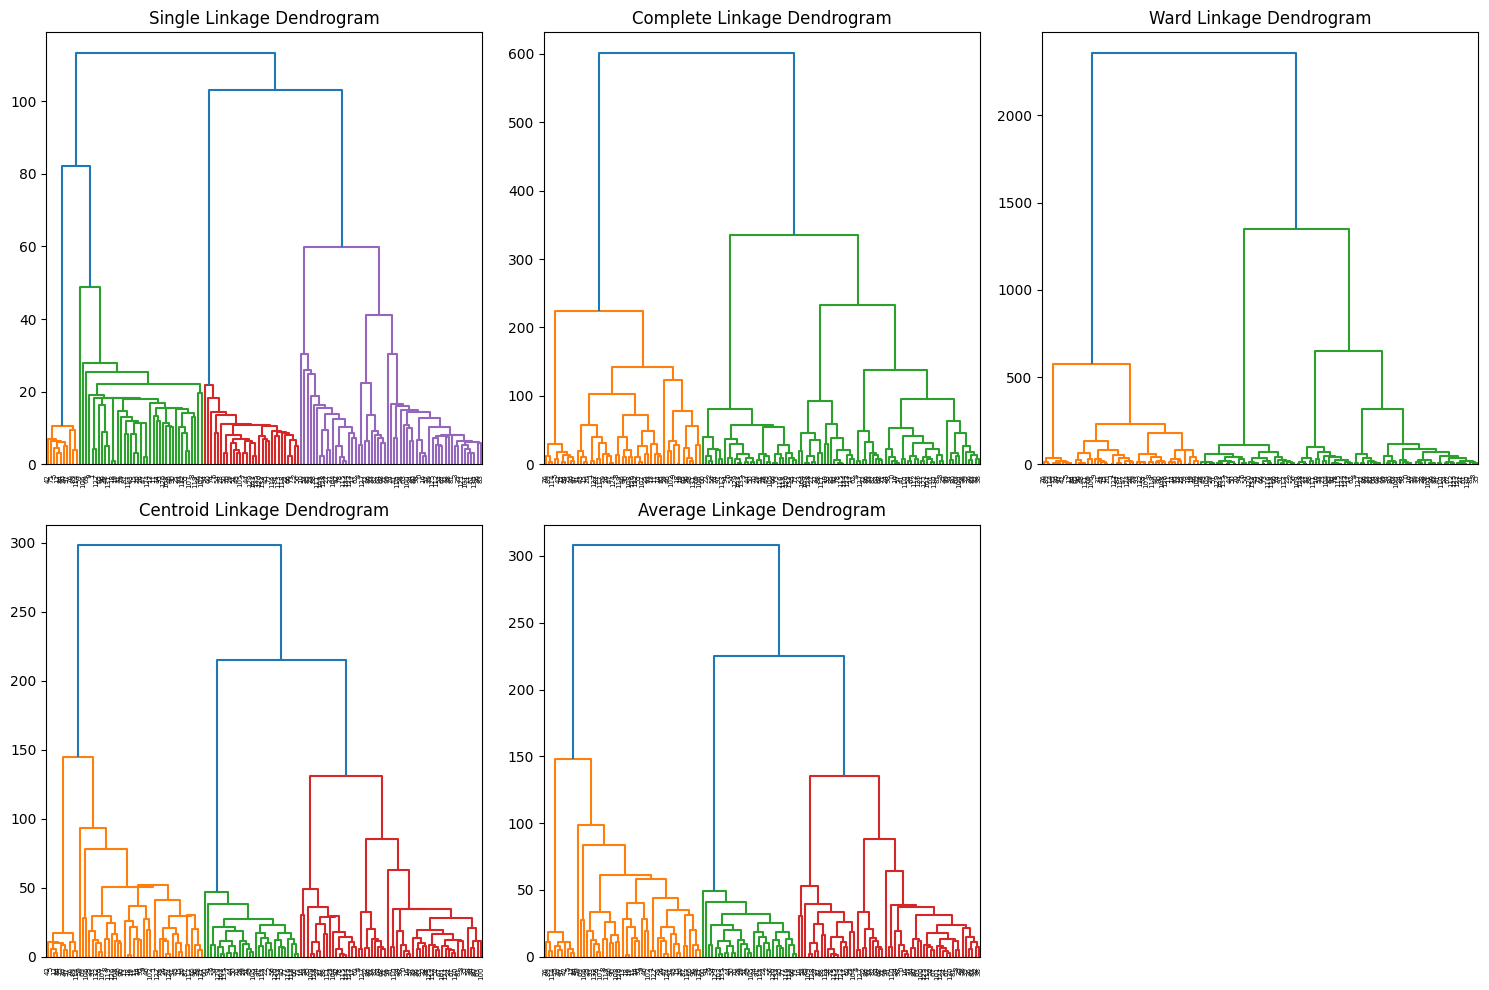

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(2, 3, 1)
dendrogram(single_linkage)
ax1.set_title('Single Linkage Dendrogram')

ax2 = fig.add_subplot(2, 3, 2)
dendrogram(complete_linkage)
ax2.set_title('Complete Linkage Dendrogram')

ax3 = fig.add_subplot(2, 3, 3)
dendrogram(ward_linkage)
ax3.set_title('Ward Linkage Dendrogram')

ax4 = fig.add_subplot(2, 3, 4)
dendrogram(centroid_linkage)
ax4.set_title('Centroid Linkage Dendrogram')

ax5 = fig.add_subplot(2, 3, 5)
dendrogram(average_linkage)
ax5.set_title('Average Linkage Dendrogram')

plt.tight_layout()
plt.show()

In [18]:
import urllib.request
import zipfile
import pandas as pd
import os

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00406/Anuran%20Calls%20%28MFCCs%29.zip"
zip_path = "anuran_calls.zip"
csv_path = "Frogs_MFCCs.csv"

# Download the zip file
urllib.request.urlretrieve(url, zip_path)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(".")

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_path)

# Display the first few rows and columns
display(df.head())
display(df.columns)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


Index(['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6',
       'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12',
       'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18',
       'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22', 'Family', 'Genus',
       'Species', 'RecordID'],
      dtype='object')

In [19]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Separate features (MFCCs) from target/metadata columns
mfcc_features = df.filter(like='MFCCs_')
target_columns = df[['Family', 'Genus', 'Species', 'RecordID']]

# Scale the feature columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(mfcc_features)

# Display the shape of the scaled features and the first few rows
print("\nShape of scaled features:", scaled_features.shape)
print("\nFirst 5 rows of scaled features:")
print(scaled_features[:5])

Missing values per column:
MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
Family      0
Genus       0
Species     0
RecordID    0
dtype: int64

Shape of scaled features: (7195, 22)

First 5 rows of scaled features:
[[ 0.14657792 -0.78050205 -1.58176852 -1.52994436  1.16866552  1.35232733
   0.59711873 -1.28718962 -1.67233323  0.54038992  1.6293942  -0.76291115
  -1.48589691  0.79662678  1.26595608 -0.55108132 -1.4272914  -1.00767817
   0.48347699  1.17790548  1.02393944 -0.59569883]
 [ 0.14657792 -0.69543929 -1.55667956 -1.10763389  1.30062214  1.41535914
   0.36309656 -1.90985292 -1.87661173  0.90396081  2.07004416 -0.88717826
  -1.95917827  0.40674258  1.41290341 -0.25052401 -1.30141208 -0.75849013
   0.17168128  0.77923889  0.

RecursionError: maximum recursion depth exceeded

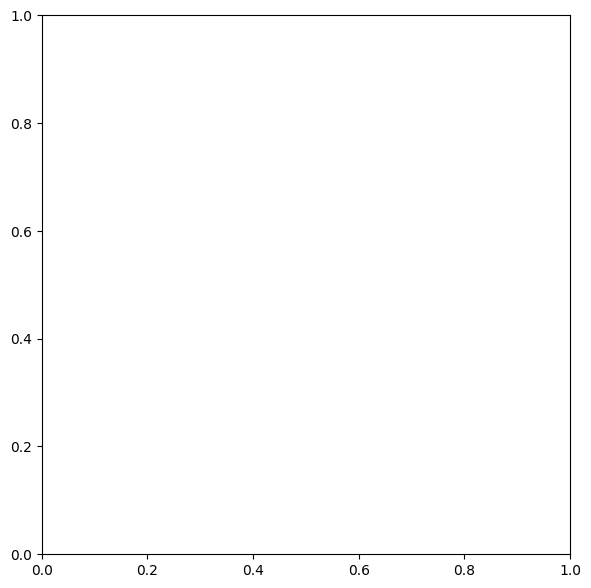

In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Apply two different linkage methods: 'single' and 'complete'
single_linkage = linkage(scaled_features, method='single')
complete_linkage = linkage(scaled_features, method='complete')

# Generate and visualize dendrograms
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
dendrogram(single_linkage)
plt.title('Single Linkage Dendrogram')

plt.subplot(1, 2, 2)
dendrogram(complete_linkage)
plt.title('Complete Linkage Dendrogram')

plt.tight_layout()
plt.show()

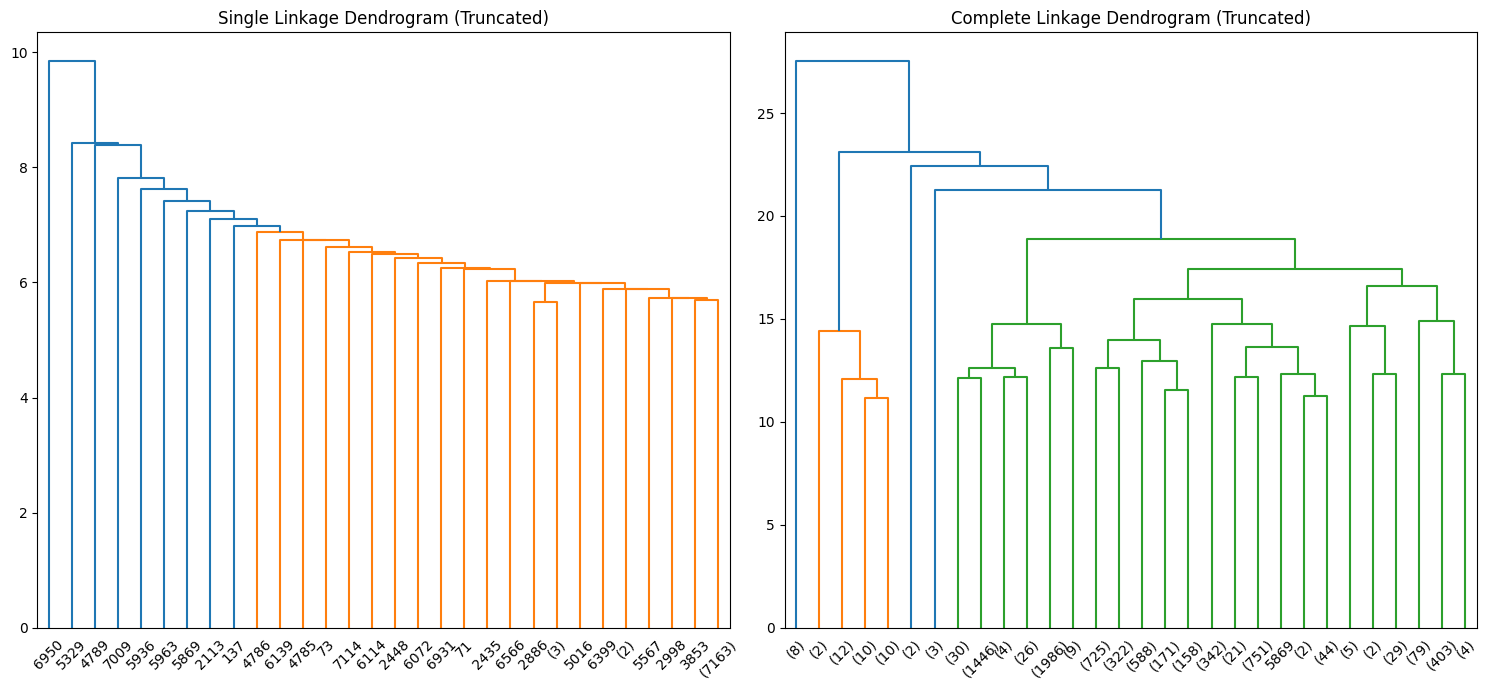

In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Apply two different linkage methods: 'single' and 'complete'
single_linkage = linkage(scaled_features, method='single')
complete_linkage = linkage(scaled_features, method='complete')

# Generate and visualize truncated dendrograms
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
dendrogram(single_linkage, truncate_mode='lastp', p=30) # Truncate to show last 30 merges
plt.title('Single Linkage Dendrogram (Truncated)')

plt.subplot(1, 2, 2)
dendrogram(complete_linkage, truncate_mode='lastp', p=30) # Truncate to show last 30 merges
plt.title('Complete Linkage Dendrogram (Truncated)')

plt.tight_layout()
plt.show()

In [23]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

# Determine the number of clusters
k = 3

# Create cluster labels using fcluster with complete linkage
complete_clusters = fcluster(complete_linkage, k, criterion='maxclust')

# Calculate the Silhouette score
silhouette_avg = silhouette_score(scaled_features, complete_clusters)

# Print the Silhouette score
print(f"Silhouette Score for Complete Linkage with {k} clusters: {silhouette_avg}")

Silhouette Score for Complete Linkage with 3 clusters: 0.5127066007801792


In [24]:
# Add the cluster labels obtained from the complete linkage clustering to the original DataFrame df
df['Complete_Linkage_Cluster'] = complete_clusters

# Group by 'Complete_Linkage_Cluster' and 'Family' and count occurrences
cluster_family_counts = df.groupby(['Complete_Linkage_Cluster', 'Family']).size().reset_index(name='Count')

# Group by 'Complete_Linkage_Cluster' and 'Genus' and count occurrences
cluster_genus_counts = df.groupby(['Complete_Linkage_Cluster', 'Genus']).size().reset_index(name='Count')

# Print the counts
print("Cluster distribution by Family:")
display(cluster_family_counts)

print("\nCluster distribution by Genus:")
display(cluster_genus_counts)

Cluster distribution by Family:


,Complete_Linkage_Cluster,Family,Count
0,1,Leptodactylidae,8
1,2,Bufonidae,2
2,2,Hylidae,25
3,2,Leptodactylidae,7
4,3,Bufonidae,66
5,3,Dendrobatidae,542
6,3,Hylidae,2140
7,3,Leptodactylidae,4405



Cluster distribution by Genus:


,Complete_Linkage_Cluster,Genus,Count
0,1,Adenomera,8
1,2,Adenomera,7
2,2,Hypsiboas,23
3,2,Osteocephalus,2
4,2,Rhinella,2
5,3,Adenomera,4135
6,3,Ameerega,542
7,3,Dendropsophus,310
8,3,Hypsiboas,1570
9,3,Leptodactylus,270


In [27]:
df['Family_Genus'] = df['Family'] + '_' + df['Genus']
display(df.head())
print(f"Number of unique Family_Genus combinations: {df['Family_Genus'].nunique()}")

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID,Family_Genus
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1,Leptodactylidae_Adenomera
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1,Leptodactylidae_Adenomera
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1,Leptodactylidae_Adenomera
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1,Leptodactylidae_Adenomera
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1,Leptodactylidae_Adenomera


Number of unique Family_Genus combinations: 8


In [28]:
from sklearn.model_selection import train_test_split

# Separate features (MFCCs) and the new target variable ('Family_Genus')
X = scaled_features
y = df['Family_Genus']

# Split data into temporary training (85%) and validation (10%) sets
X_temp_train, X_validation, y_temp_train, y_validation = train_test_split(
    X, y, test_size=0.10, stratify=y, random_state=42
)

# Split the temporary training set into initial labeled (5%) and final training (80%) sets
# Calculate test_size relative to the temporary training set size
test_size_initial_labeled = 0.05 / (1 - 0.10) # 5% of original data / 85% of original data

X_initial_labeled, X_train, y_initial_labeled, y_train = train_test_split(
    X_temp_train, y_temp_train, test_size=test_size_initial_labeled, stratify=y_temp_train, random_state=42
)

# Print the shapes of the resulting sets
print("Shape of initial labeled features:", X_initial_labeled.shape)
print("Shape of initial labeled target:", y_initial_labeled.shape)
print("Shape of validation features:", X_validation.shape)
print("Shape of validation target:", y_validation.shape)
print("Shape of training features:", X_train.shape)
print("Shape of training target:", y_train.shape)

Shape of initial labeled features: (6115, 22)
Shape of initial labeled target: (6115,)
Shape of validation features: (720, 22)
Shape of validation target: (720,)
Shape of training features: (360, 22)
Shape of training target: (360,)


In [29]:
# Acknowledge that the initial data is already labeled
print("The initial 5% of the data is already labeled with the combined family and genus classes.")
print("The labels are stored in the 'y_initial_labeled' variable.")

# Display the first few labels from y_initial_labeled
print("\nFirst 5 labels from y_initial_labeled:")
display(y_initial_labeled.head())

The initial 5% of the data is already labeled with the combined family and genus classes.
The labels are stored in the 'y_initial_labeled' variable.

First 5 labels from y_initial_labeled:


,Family_Genus
5883,Hylidae_Hypsiboas
5311,Hylidae_Hypsiboas
3048,Leptodactylidae_Adenomera
4622,Leptodactylidae_Adenomera
1911,Leptodactylidae_Adenomera


In [38]:
from sklearn.semi_supervised import LabelSpreading
semi_supervised_model = LabelSpreading(kernel='knn', alpha=0.5, n_neighbors=7)

print(semi_supervised_model)

LabelSpreading(alpha=0.5, kernel='knn')


In [39]:
import numpy as np

# Convert y_initial_labeled and y_train to string type before combining
y_initial_labeled_str = y_initial_labeled.astype(str)
y_train_str = y_train.astype(str)

# Combine initial labeled features and training features
X_combined = np.vstack((X_initial_labeled, X_train))

# Combine initial labeled target variable and training target variable
# Represent unlabeled data in y_train with -1 as string
y_combined_str = np.concatenate((y_initial_labeled_str, np.full(y_train_str.shape, '-1')))

# Train the semi-supervised model on the combined data
semi_supervised_model.fit(X_combined, y_combined_str)

print("Semi-supervised model training complete.")

Semi-supervised model training complete.


In [40]:
from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(semi_supervised_model, X_combined, y_combined_str, cv=5, scoring='accuracy')


print("Cross-validation scores:", cv_scores)
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

Cross-validation scores: [0.92277992 0.92046332 0.92586873 0.92355212 0.92277992]
Mean cross-validation score: 0.923088803088803


In [34]:
from sklearn.metrics import accuracy_score

# Make predictions on the validation set
y_pred = semi_supervised_model.predict(X_validation)

# Calculate the accuracy score
accuracy = accuracy_score(y_validation, y_pred)

# Print the accuracy score
print(f"Accuracy on the validation set: {accuracy}")

Accuracy on the validation set: 0.9736111111111111


In [41]:

print("Cross-validation scores:", cv_scores)
print(f"Mean cross-validation score: {np.mean(cv_scores):.4f}")
print(f"Accuracy on the validation set: {accuracy:.4f}")



Cross-validation scores: [0.92277992 0.92046332 0.92586873 0.92355212 0.92277992]
Mean cross-validation score: 0.9231
Accuracy on the validation set: 0.9736


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Instantiate the Logistic Regression model
supervised_model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence

# Train the supervised model using only the initial labeled data
supervised_model.fit(X_initial_labeled, y_initial_labeled)

# Make predictions on the validation set using the trained supervised model
y_pred_supervised = supervised_model.predict(X_validation)

# Calculate the accuracy of the supervised model's predictions on the validation data
accuracy_supervised = accuracy_score(y_validation, y_pred_supervised)

# Print the accuracy of the supervised model on the validation set
print(f"Accuracy of the supervised model on the validation set: {accuracy_supervised}")

Accuracy of the supervised model on the validation set: 0.9541666666666667
